# **DEMO**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from tqdm import tqdm
import codedapertures as ca
import scipy as sp
import os
import cv2

from scipy.ndimage.filters import convolve
import time
import pickle

from utils import get_objects_from_config
from experiment import CodApSimulator, play_simulation, plot_results
from image_preprocessing import process_image
from decoding_algorythms import get_mura_decoding_pattern

## 1. Juli's and George's experiment

One of our first objectives was to simulate numerically what our peers Juli and George were doing experimentally, that is, testing the results seen on a screen of iluminating masks with different shapes with sources also with different shapes.

- Descripción del experimento
- Descripción del uso de sus imágenes y de desición de variables
- !!! Cambiar Fotons a Photons !!!

In [2]:
def simul_exp(config_path):
    source, slit, sensor, options = get_objects_from_config(config_path)
    simulator = CodApSimulator(options=options, source=source, slit=slit, sensor=sensor)
    play_simulation(simulator=simulator, config_path=config_path)

    fig, axs = plt.subplots(ncols = 3, figsize = (15,6))
    plt.suptitle(f'Detection of Skipper-CCD, Source-Sensor distance: {simulator.options.source_to_sensor_distance} mm, Slit-Sensor distance: 319 mm', fontsize = 'xx-large')
    im0 = axs[0].imshow(simulator.source.screen, cmap = "Spectral")
    axs[0].set_title("Source")
    axs[0].grid(False)
    fig.colorbar(im0, ax=axs[0], label = 'Source Photons', orientation = 'horizontal')
    axs[1].imshow(simulator.slit.mask, cmap = "binary_r")
    axs[1].set_title("Slit")
    axs[1].grid(False)
    im1 = axs[2].imshow(simulator.sensor.screen, cmap = "Spectral")
    axs[2].set_title("Sensor Screen")
    axs[2].grid(False)
    fig.colorbar(im1, ax=axs[2], label = 'Detected Photons', orientation = 'horizontal')
    plt.show()
    plt.savefig(os.path.join(simulator.saving_dir, "exp_juli_george.png"))

    return simulator

#### 1.1) **Source:** 'Lambda - **Mask:** 'Carita Feliz'

In [3]:
config_path = "exp_juli_george.json"

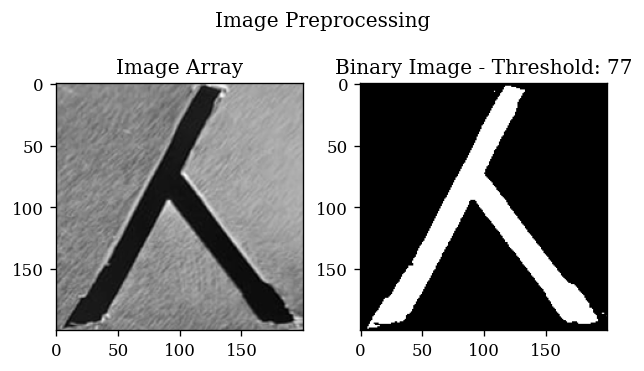

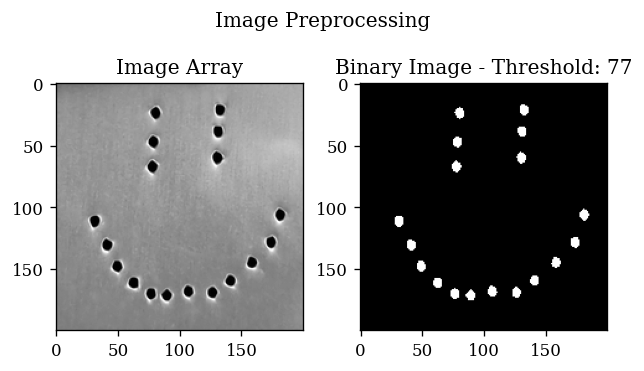

The chosen directory is not empty:
results\exp_juli_george\exp_juli_george1


Process 16124:   0%|          | 34/50000 [00:00<02:28, 336.56it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 16124: 100%|██████████| 50000/50000 [01:52<00:00, 446.14it/s]


Adding noise to the image...
Done!
Saving results...


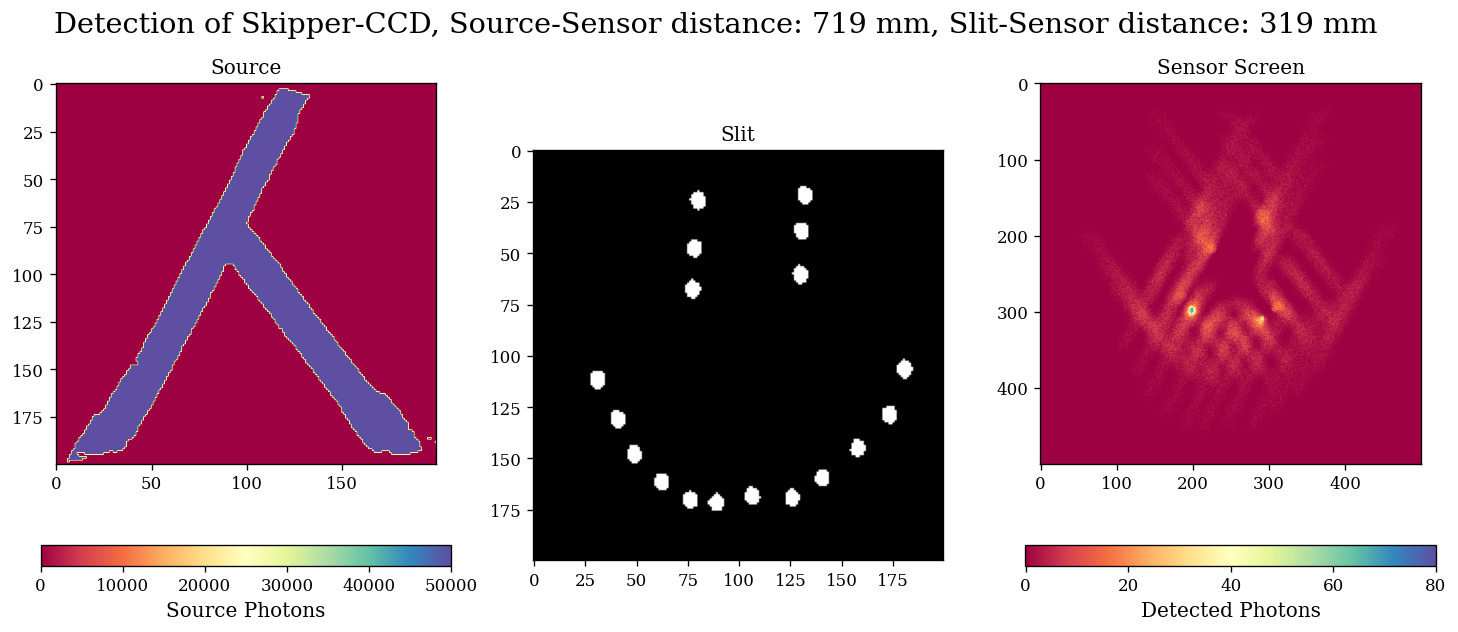

<Figure size 720x480 with 0 Axes>

In [64]:
sim1 = simul_exp(config_path)

#### 1.2) **Source:** 'Lambda' - **Mask:** 'Lambda'

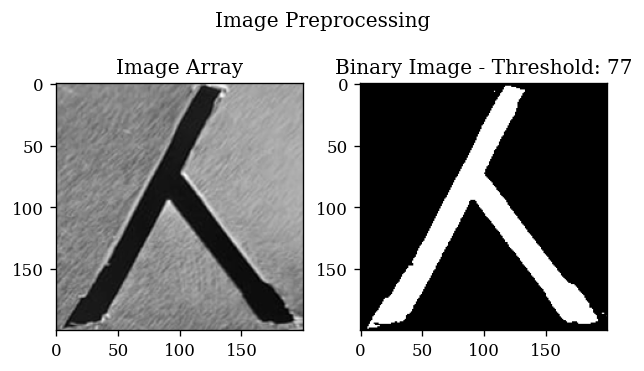

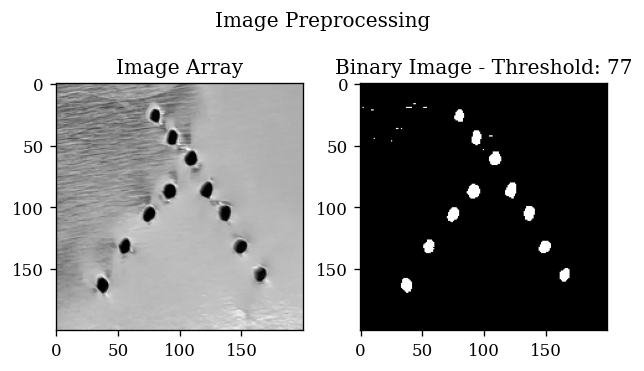

The chosen directory is not empty:
results\exp_juli_george\exp_juli_george2


Process 4420:   0%|          | 34/50000 [00:00<02:28, 335.70it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 4420: 100%|██████████| 50000/50000 [01:59<00:00, 419.38it/s]


Adding noise to the image...
Done!
Saving results...


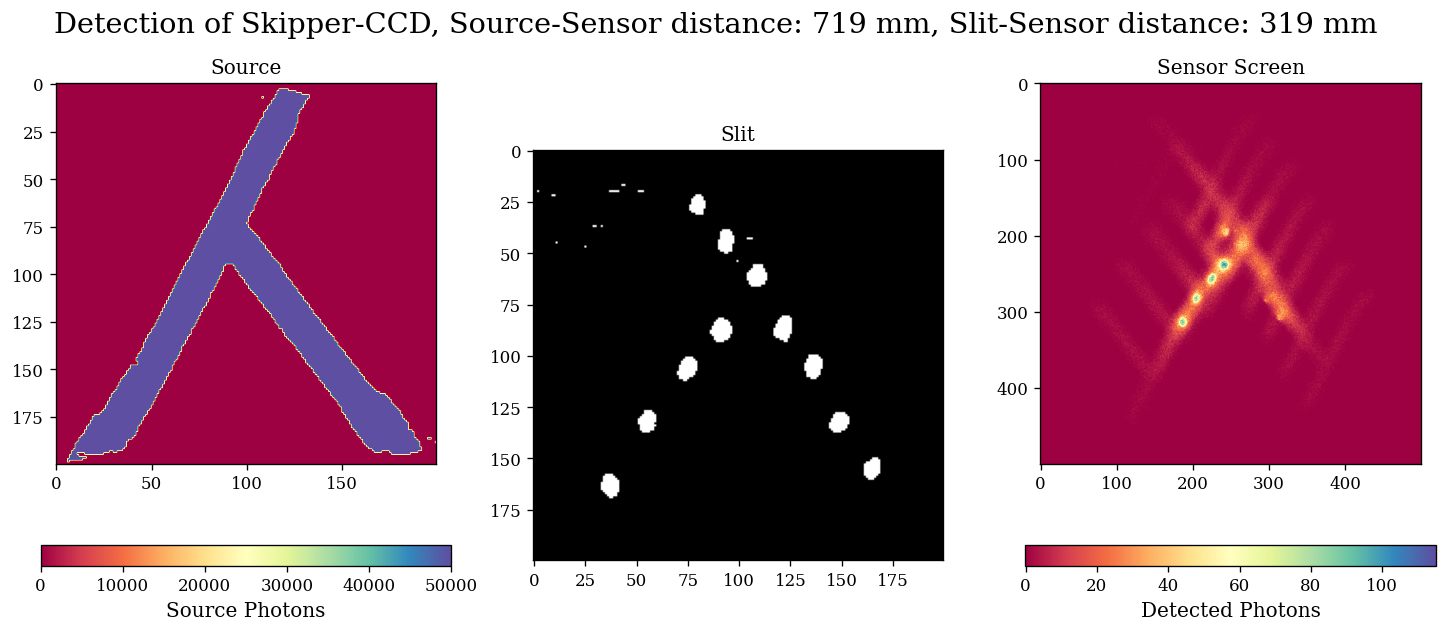

<Figure size 720x480 with 0 Axes>

In [4]:
sim2 = simul_exp(config_path)

#### 1.3) **Source:** 'Lambda' - **Mask:** 'Pinhole'

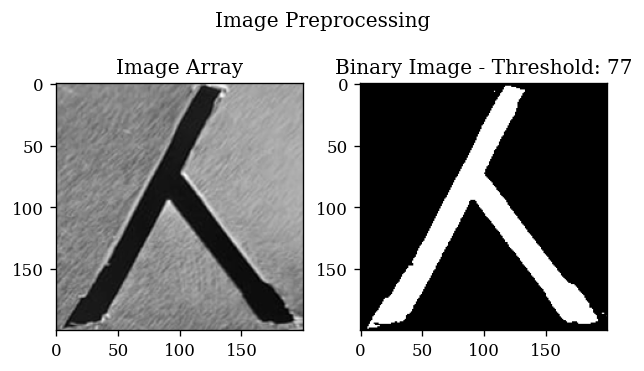

The chosen directory is not empty:
results\exp_juli_george\exp_juli_george3


Process 11344:   0%|          | 20/50000 [00:00<04:34, 182.17it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 11344: 100%|██████████| 50000/50000 [01:43<00:00, 481.63it/s]


Adding noise to the image...
Done!
Saving results...


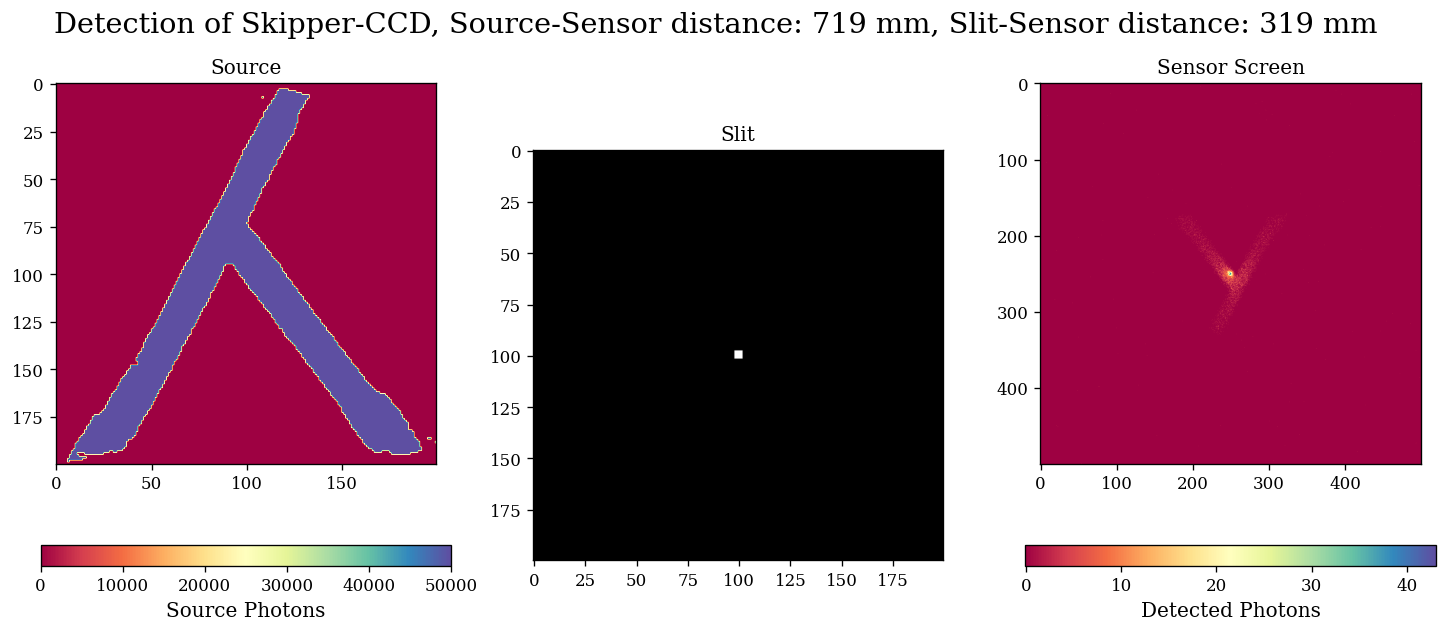

<Figure size 720x480 with 0 Axes>

In [4]:
sim3 = simul_exp(config_path)

## 2. Skipper Characterization

* Details of read out noise and dark current

#### Studing the results detecting different sources passing through a slit with a Perfect Detector - Skipper CCD - Normal CCD 

In [2]:
def compare_exps(config_paths, plot_hist = False):
    sensors = []
    bin_edges = []
    hist_values = []

    for config in config_paths:
        source, slit, sensor, options = get_objects_from_config(config)
        simulator = CodApSimulator(options=options, source=source, slit=slit, sensor=sensor)
        play_simulation(simulator=simulator, config_path=config)
        sensors.append(simulator.sensor)


        unique, c = np.unique(simulator.sensor.screen, return_counts=True)
        h_val, b_edges = np.histogram(simulator.sensor.screen, bins=np.round(unique))
        bin_edges.append(b_edges)
        hist_values.append(h_val)


    #Graph source vs slit (Experiment State)
    fig, axs = plt.subplots(ncols = 2, figsize = (10,6))
    plt.suptitle(f'Experiment State, Source-Sensor distance: {simulator.options.source_to_sensor_distance} mm, Slit-Sensor distance: 319 mm', fontsize = 'xx-large')
    im0 = axs[0].imshow(simulator.source.screen, cmap = "Spectral")
    axs[0].set_title("Source")
    axs[0].grid(False)
    fig.colorbar(im0, ax=axs[0], label = 'Source Photons', orientation = 'horizontal')
    axs[1].imshow(simulator.slit.mask, cmap = "binary_r")
    axs[1].set_title("Slit")
    axs[1].grid(False)
    plt.show()

    #Graph 3 results
    fig, axs = plt.subplots(ncols = 3, figsize = (15,6))
    plt.suptitle(f'Detection of a same experiment by different sensors', fontsize = 'xx-large')
    im0 = axs[0].imshow(sensors[0].screen, cmap = "Spectral")
    axs[0].set_title("Perfect CCD")
    axs[0].grid(False)
    fig.colorbar(im0, ax=axs[0], label = 'Detected Photons', orientation = 'horizontal')
    im1 = axs[1].imshow(sensors[1].screen, cmap = "Spectral")
    axs[1].set_title("Skipper CCD")
    axs[1].grid(False)
    fig.colorbar(im1, ax=axs[1], label = 'Detected Photons', orientation = 'horizontal')
    im2 = axs[2].imshow(sensors[2].screen, cmap = "Spectral")
    axs[2].set_title("Normal CCD")
    axs[2].grid(False)
    fig.colorbar(im2, ax=axs[2], label = 'Detected Photons', orientation = 'horizontal')
    plt.show()

    if plot_hist == True:
        # Plot the histogram
        fig, axs = plt.subplots(ncols = 3, figsize = (15,6))
        plt.suptitle(f'Distribution of charge', fontsize = 'xx-large')
        axs[0].bar(bin_edges[0][:-1], hist_values[0]/np.sum(hist_values[0]), align='center', width=0.5, ec='k', linewidth = 0.4, color= 'red')
        axs[0].set_xlabel('N° of photons per pixel')
        axs[0].set_ylabel('Frequency')
        axs[0].set_title('Perfect CCD')
        axs[1].bar(bin_edges[1][:-1], hist_values[1]/np.sum(hist_values[1]), align='center', width=0.5, ec='k', linewidth = 0.4, color= 'green')
        axs[1].set_xlabel('N° of photons per pixel')
        axs[1].set_ylabel('Frequency')
        axs[1].set_title('Skipper CCD')
        axs[2].bar(bin_edges[2][:-1], hist_values[2]/np.sum(hist_values[2]), align='center', width=0.5, ec='k', linewidth = 0.4, color= 'yellow')
        axs[2].set_xlabel('N° of photons per pixel')
        axs[2].set_ylabel('Frequency')
        axs[2].set_title('Normal CCD')
        plt.show()

    return simulator, sensors        

Experiment 1:
- **Source:** *Grid*
- **Slit:** *Pinhole*

In [3]:
config_paths = ["characterization_perfect.json", "characterization_skipper.json", "characterization_ccd.json"]

The chosen directory is not empty:
results\characterization_perfect\characterization


Process 5692:   0%|          | 103/50000 [00:00<00:49, 1011.56it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 5692: 100%|██████████| 50000/50000 [00:27<00:00, 1806.88it/s]


Adding noise to the image...
Done!
Saving results...
The chosen directory is not empty:
results\characterization_skipper\characterization


Process 5692:   0%|          | 113/50000 [00:00<00:44, 1129.77it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 5692: 100%|██████████| 50000/50000 [00:27<00:00, 1788.67it/s]


Adding noise to the image...
Done!
Saving results...
The chosen directory is not empty:
results\characterization_ccd\characterization


Process 5692:   0%|          | 138/50000 [00:00<00:36, 1379.93it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 5692: 100%|██████████| 50000/50000 [00:22<00:00, 2221.22it/s]


Adding noise to the image...
Done!
Saving results...


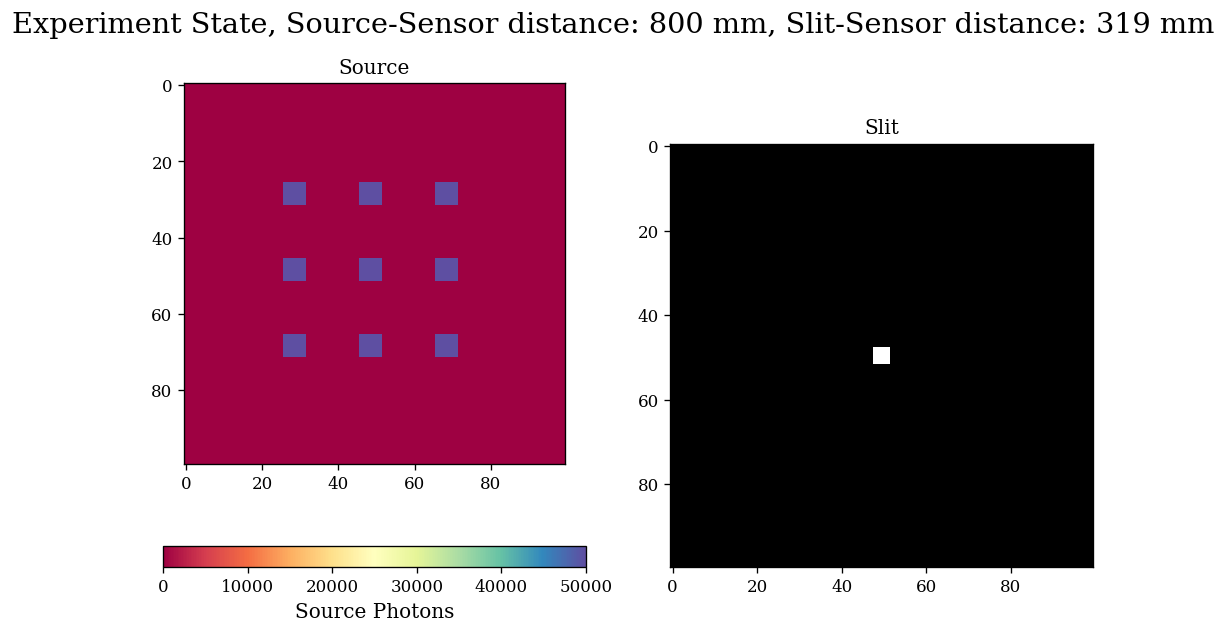

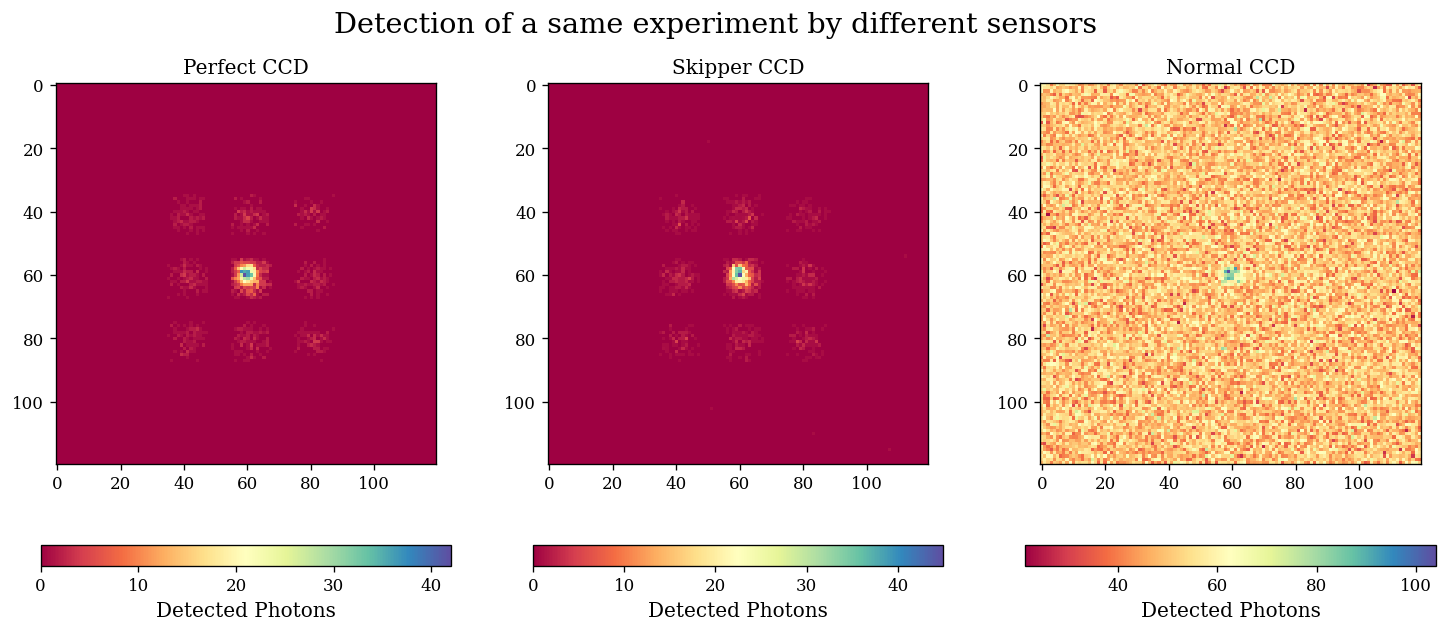

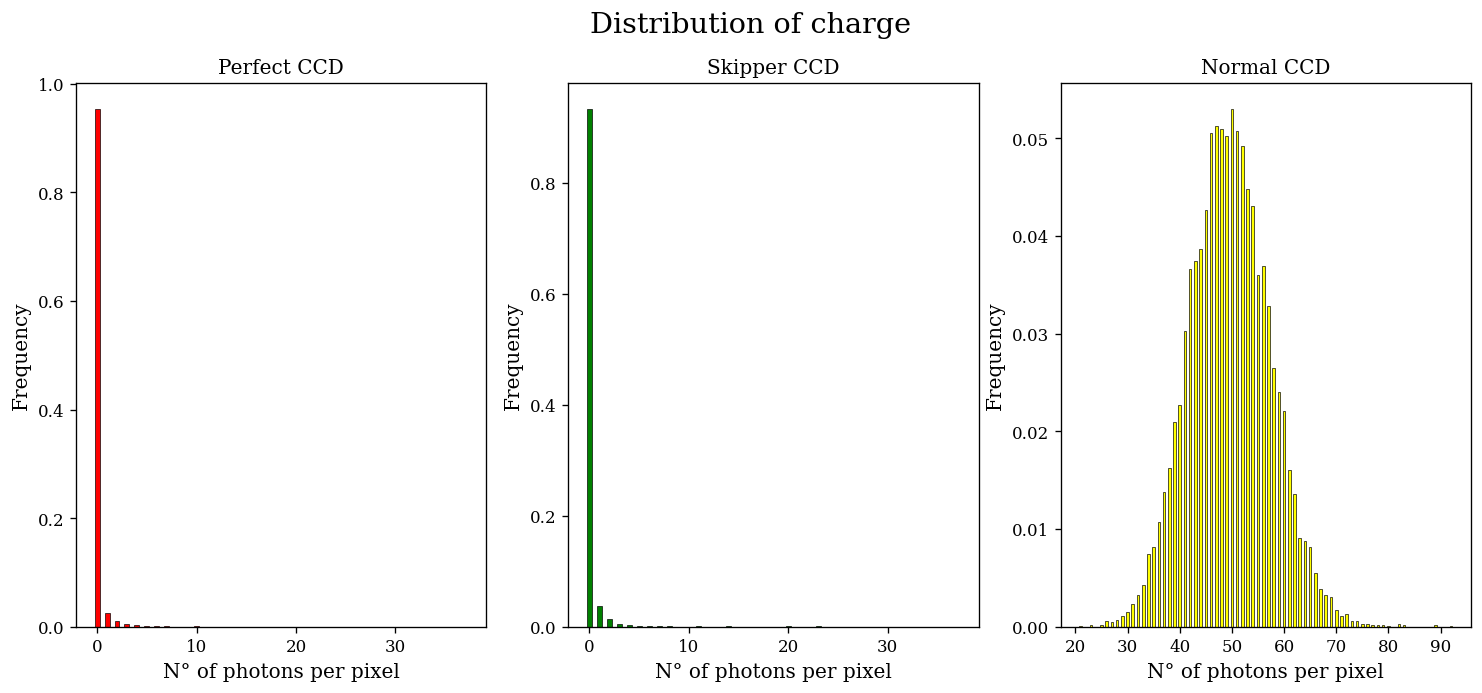

In [4]:
sim1, sensors1 = compare_exps(config_paths, plot_hist= True)

Experiment 2:
- **Source:** *Lambda*
- **Slit:** *Pinhole*

The chosen directory is not empty:
results\characterization_perfect\characterization2


Process 12816:   0%|          | 48/50000 [00:00<01:48, 459.99it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 12816: 100%|██████████| 50000/50000 [01:04<00:00, 773.15it/s]


Adding noise to the image...
Done!
Saving results...
The chosen directory is not empty:
results\characterization_skipper\characterization2


Process 12816:   0%|          | 79/50000 [00:00<01:03, 783.48it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 12816: 100%|██████████| 50000/50000 [01:07<00:00, 739.91it/s]


Adding noise to the image...
Done!
Saving results...
The chosen directory is not empty:
results\characterization_ccd\characterization2


Process 12816:   0%|          | 53/50000 [00:00<01:43, 482.98it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 12816: 100%|██████████| 50000/50000 [01:12<00:00, 691.11it/s]


Adding noise to the image...
Done!
Saving results...


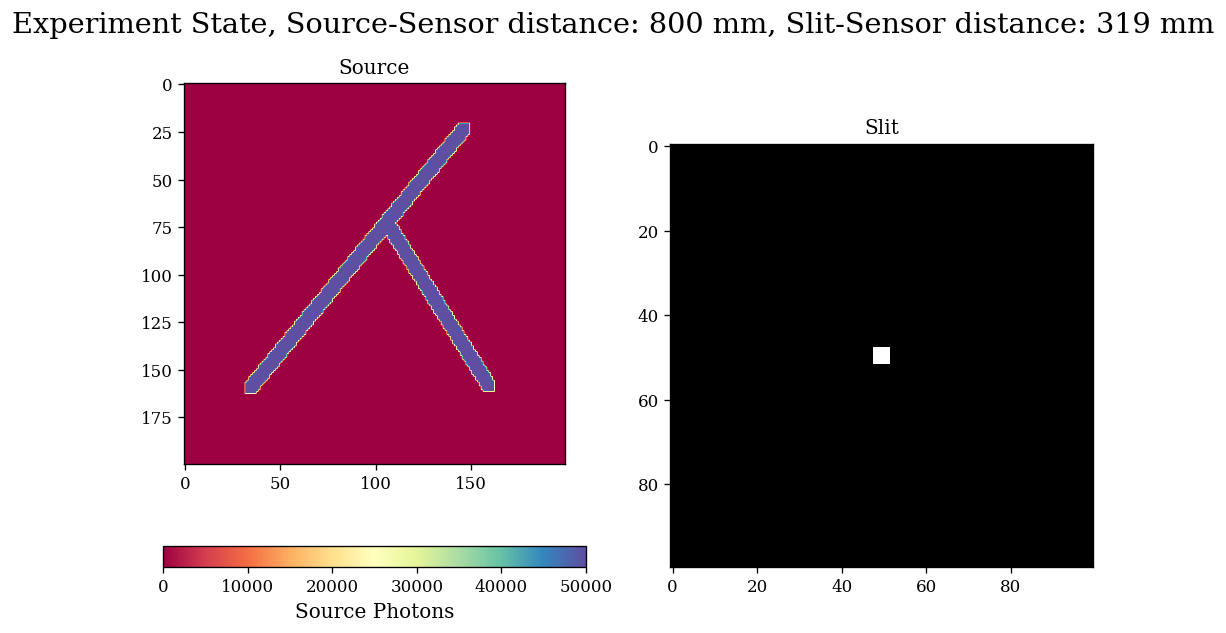

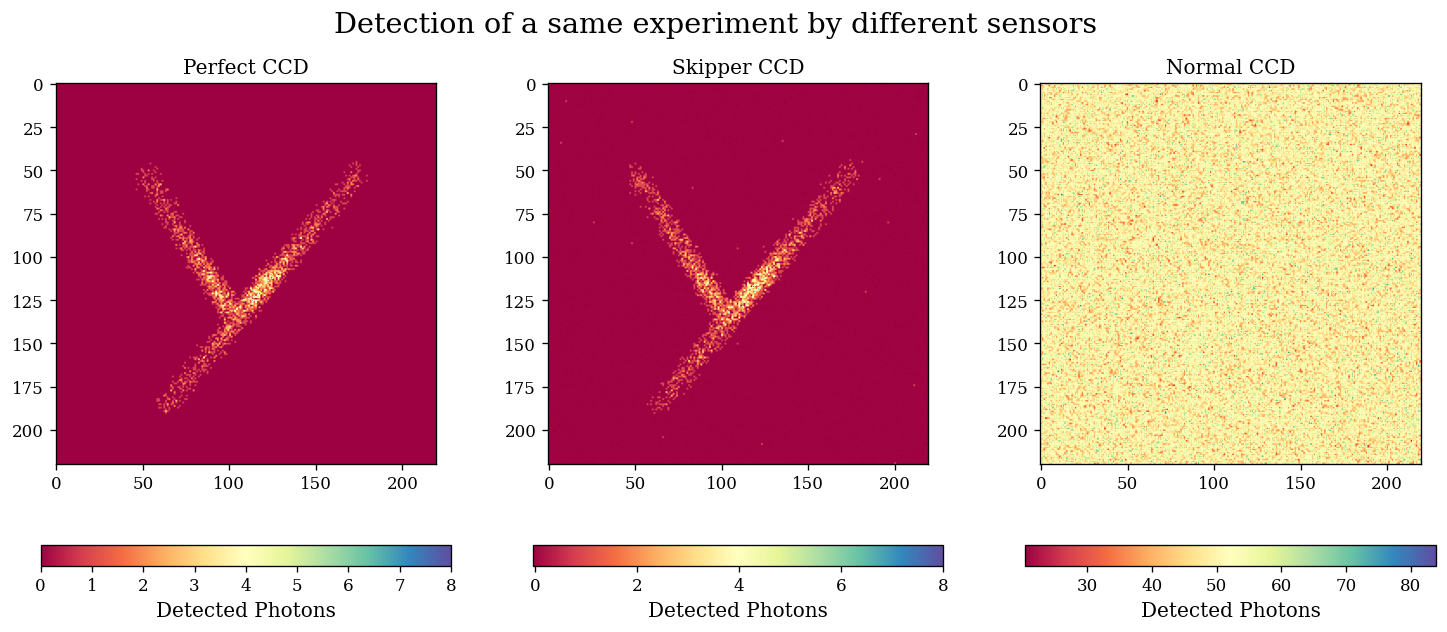

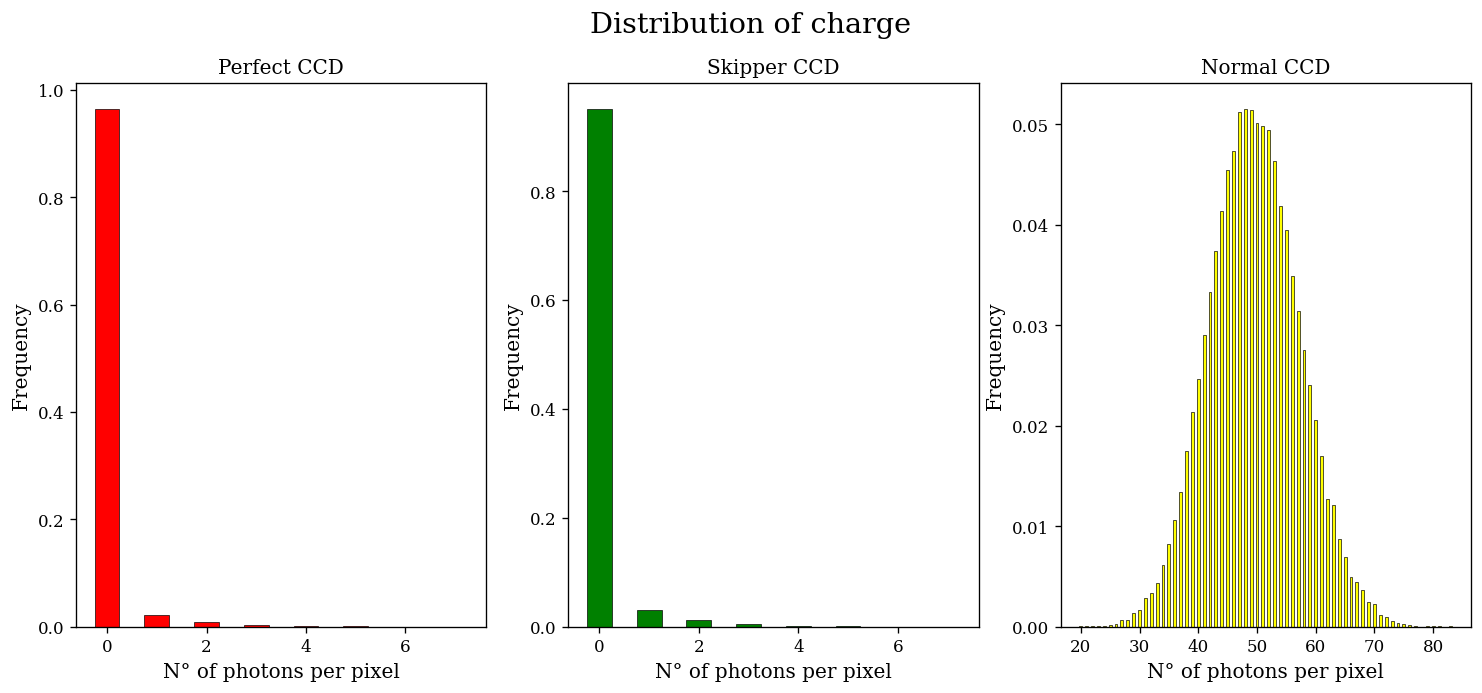

In [4]:
sim2, sensors2 = compare_exps(config_paths, plot_hist=True)

Experiment 3:
- **Source:** *Grid*
- **Slit:** *Phi*

The chosen directory is not empty:
results\characterization_perfect\characterization3


Process 16124:   0%|          | 188/50000 [00:00<00:26, 1863.60it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 16124: 100%|██████████| 50000/50000 [00:22<00:00, 2228.92it/s]


Adding noise to the image...
Done!
Saving results...
In loop:
bin_edges: 58
h_val: 57
The chosen directory is not empty:
results\characterization_skipper\characterization3


Process 16124:   0%|          | 239/50000 [00:00<00:21, 2357.72it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 16124: 100%|██████████| 50000/50000 [00:23<00:00, 2161.38it/s]


Adding noise to the image...
Done!
Saving results...
In loop:
bin_edges: 14400
h_val: 14399
The chosen directory is not empty:
results\characterization_ccd\characterization3


Process 16124:   0%|          | 207/50000 [00:00<00:24, 2026.08it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 16124: 100%|██████████| 50000/50000 [00:22<00:00, 2189.22it/s]


Adding noise to the image...
Done!
Saving results...
In loop:
bin_edges: 14400
h_val: 14399
Out of loop:
bin_edges[0]: 57, bin_edges[1]: 14399, bin_edges[2]: 14399
h_val:
hist_values[0]: 57, hist_values[1]: 14399, hist_values[2]: 14399


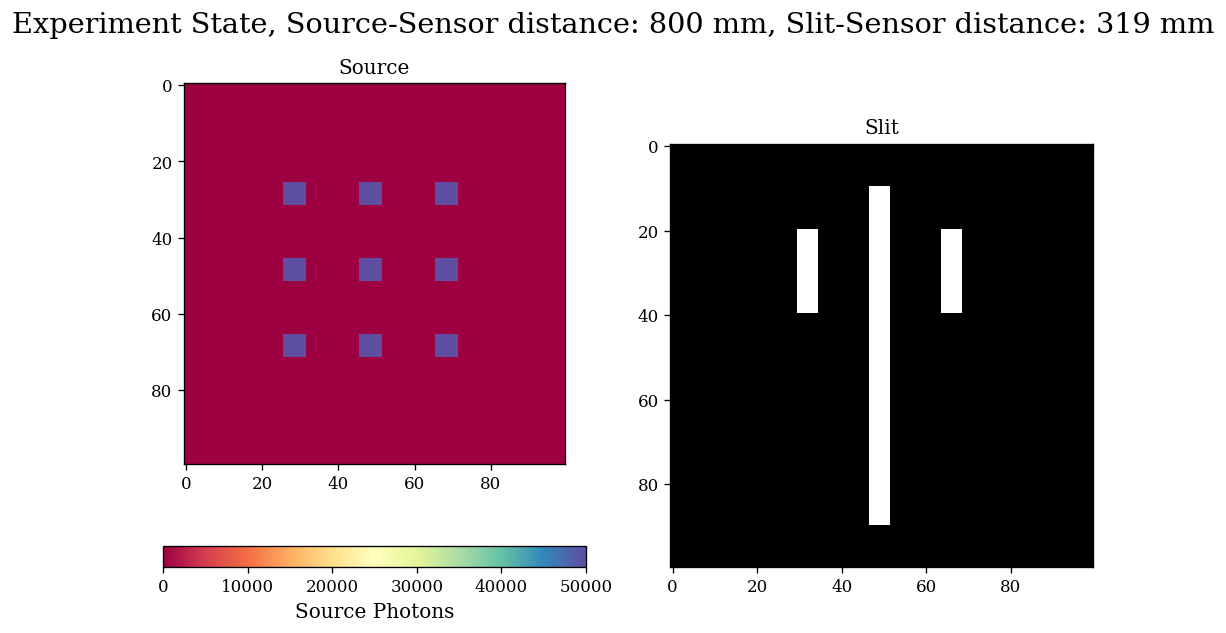

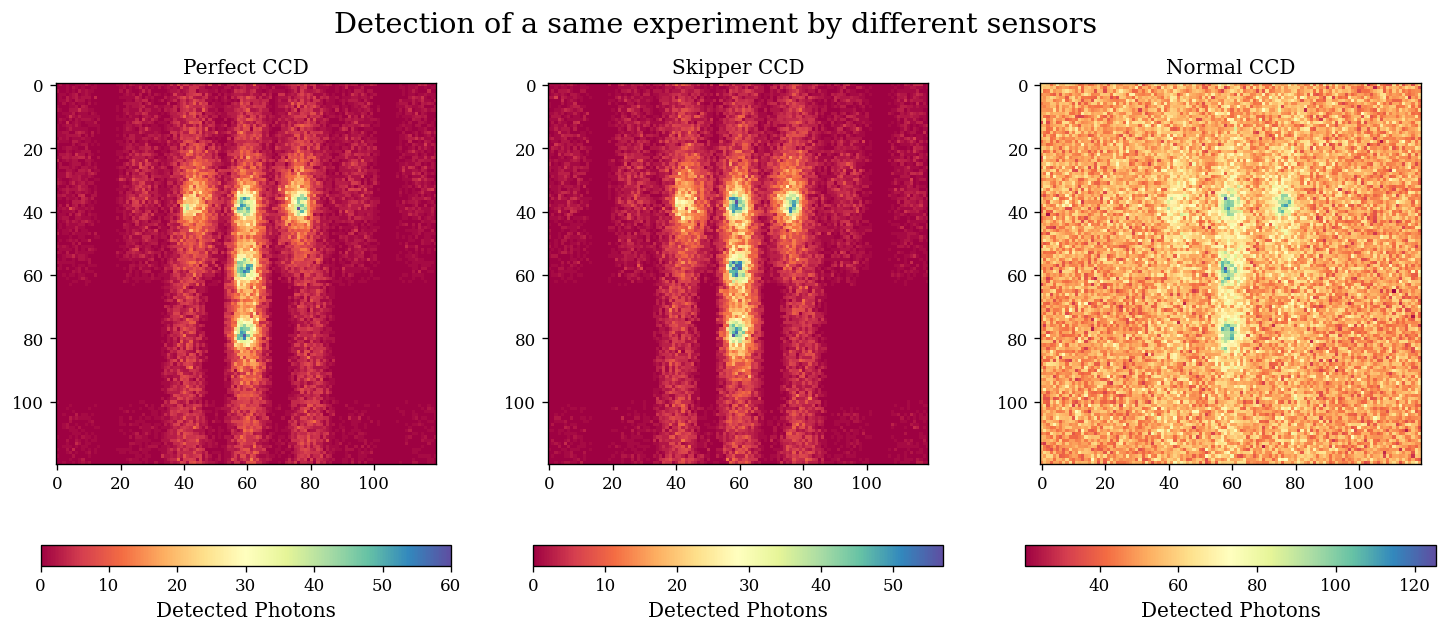

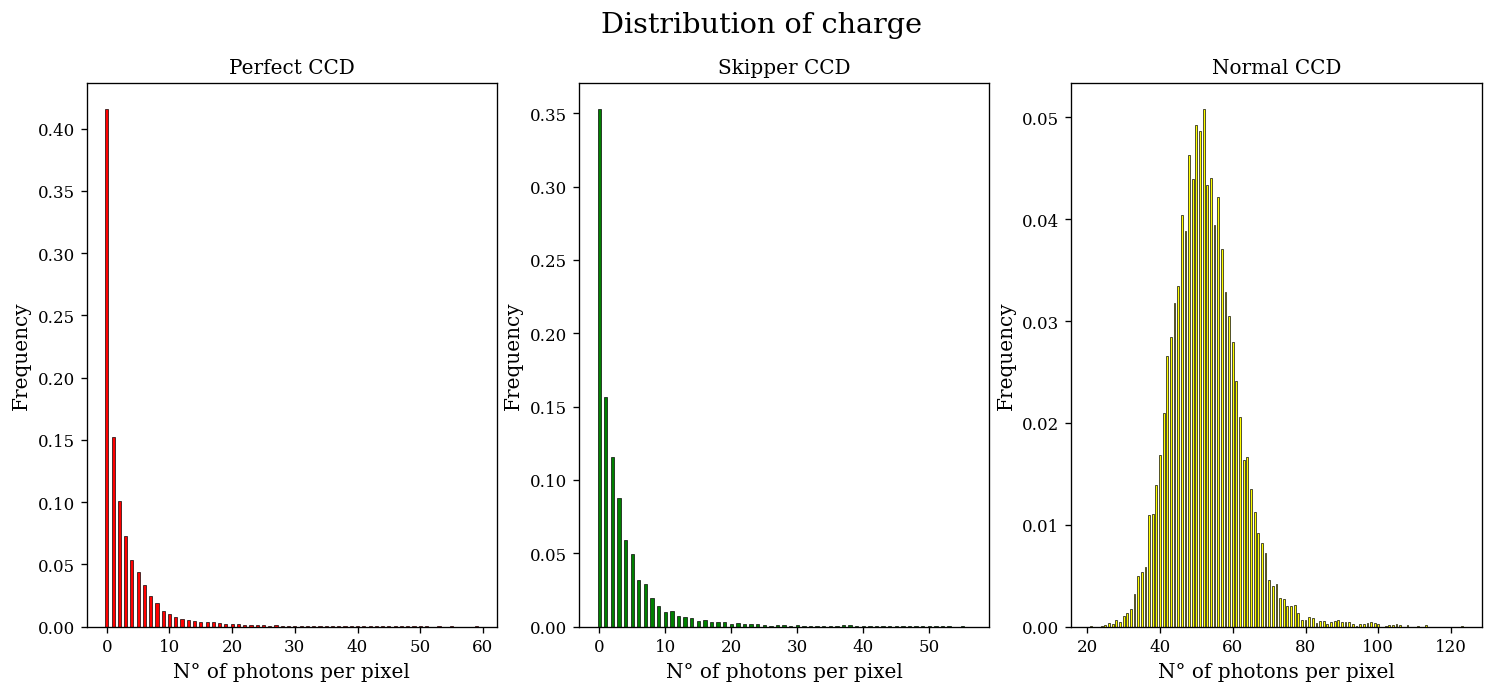

In [58]:
sim3, sensors3 = compare_exps(config_paths, plot_hist=True)

Experiment 4:
- **Source:** *Frame*
- **Slit:** *Phi*

The chosen directory is not empty:
results\characterization_perfect\characterization4


Process 14712:   0%|          | 78/50000 [00:00<01:06, 753.21it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 14712: 100%|██████████| 50000/50000 [00:33<00:00, 1490.73it/s]


Adding noise to the image...
Done!
Saving results...
The chosen directory is not empty:
results\characterization_skipper\characterization4


Process 14712:   0%|          | 118/50000 [00:00<00:42, 1178.47it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 14712: 100%|██████████| 50000/50000 [00:35<00:00, 1406.87it/s]


Adding noise to the image...
Done!
Saving results...
The chosen directory is not empty:
results\characterization_ccd\characterization4


Process 14712:   0%|          | 116/50000 [00:00<00:44, 1120.50it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 14712: 100%|██████████| 50000/50000 [00:30<00:00, 1614.06it/s]


Adding noise to the image...
Done!
Saving results...


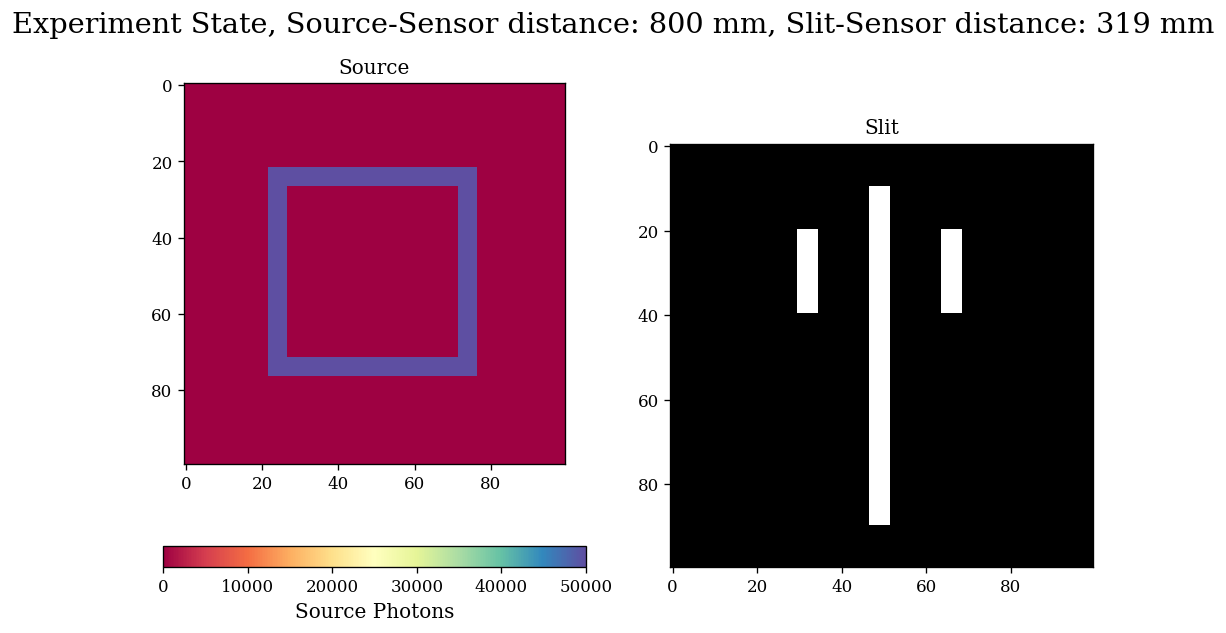

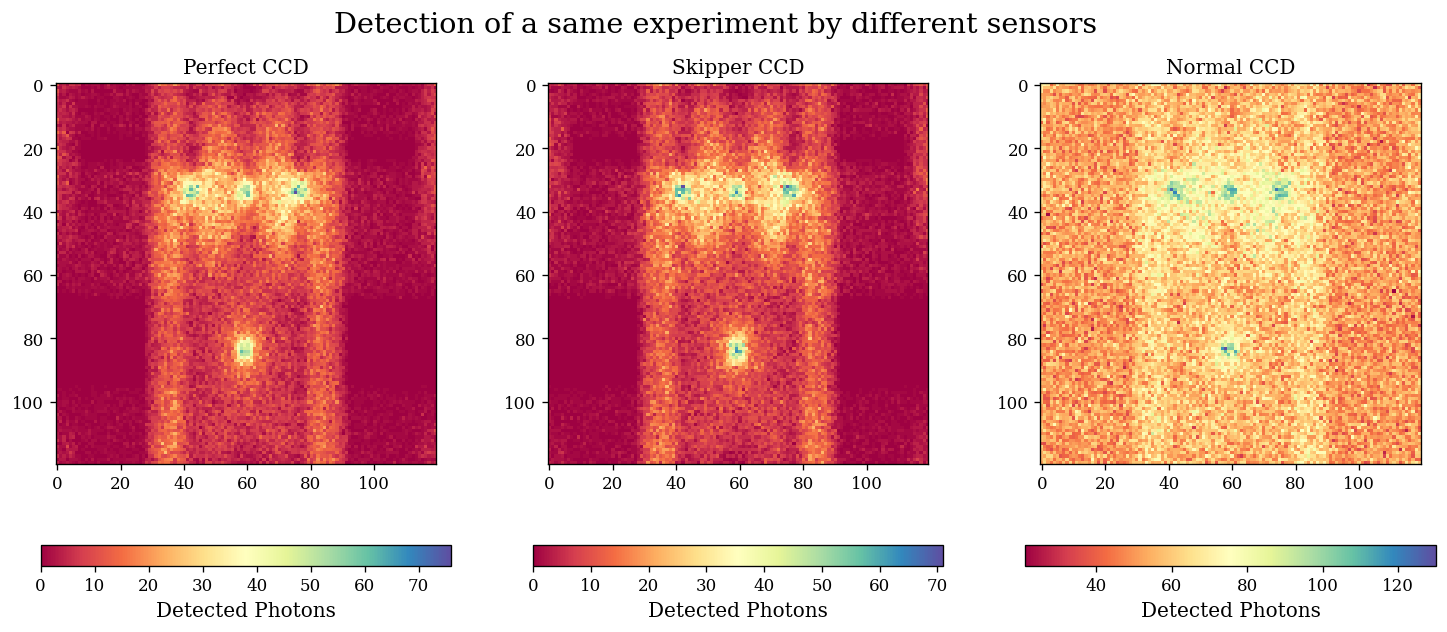

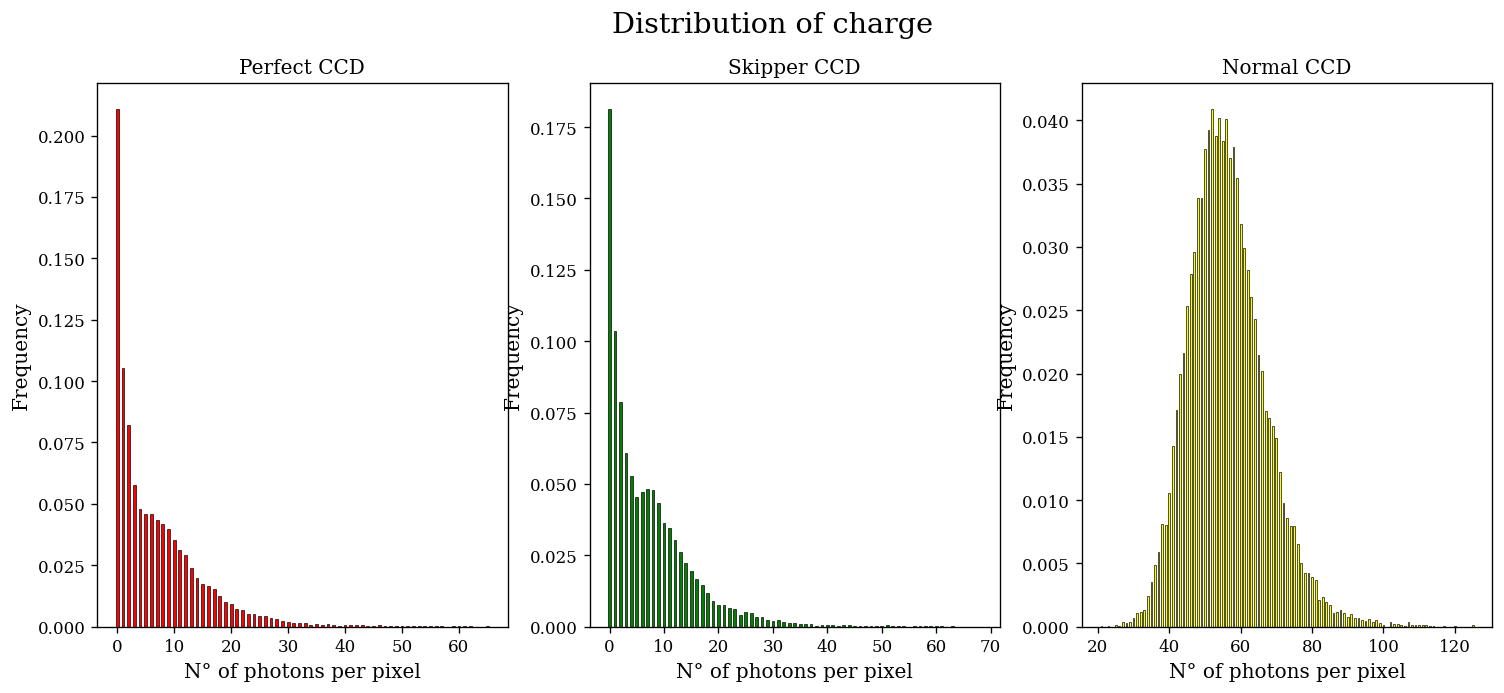

In [5]:
sim4, sensors4 = compare_exps(config_paths, plot_hist=True)

## 3. Study of Decoding Algorithms

In [2]:
def graph_ca(simulator):
    fig, axs = plt.subplots(ncols = 4,  figsize = (20,6))
    plt.suptitle(f'Detection of Skipper-CCD, Source-Sensor distance: {simulator.options.source_to_sensor_distance} mm, Slit-Sensor distance: {simulator.options.source_to_sensor_distance - simulator.options.source_to_slit_distance} mm', fontsize = 'xx-large')
    im0 = axs[0].imshow(simulator.source.screen, cmap = "Spectral")
    axs[0].set_title("Source")
    axs[0].grid(False)
    fig.colorbar(im0, ax=axs[0], label = 'Source Photons', orientation = 'horizontal')
    axs[1].imshow(simulator.slit.mask, cmap = "binary_r")
    axs[1].set_title("Slit")
    axs[1].grid(False)
    fig.savefig(os.path.join(simulator.saving_dir, "results0.png"))
    im2 = axs[2].imshow(simulator.sensor.screen, cmap = "Spectral")
    axs[2].set_title("Sensor")
    axs[2].grid(False)
    fig.colorbar(im2, ax=axs[2], label = 'Detected Photons', orientation = 'horizontal')
    im3 = axs[3].imshow((simulator.decoder.decoded_image), cmap = "Spectral")
    axs[3].set_title("Decoded Image")
    axs[3].grid(False)
    fig.colorbar(im3, ax=axs[3], label = 'Photons in Reconstruction', orientation = 'horizontal')
    fig.savefig(os.path.join(simulator.saving_dir, "results1.png"))
    plt.show()


### **3.1) MURA**

In [3]:
configs = ['mura_exps_trin/mura_exp0.json', 'mura_exps_trin/mura_exp1.json', 'mura_exps_trin/mura_exp2.json', 'mura_exps_trin/mura_exp3.json', 'mura_exps_trin/mura_exp4.json']
simulators = []

Modifico la distancia entre sistema Source-Slit y el sensor. La distancia Source-Slit queda siempre fija a 5000 mm.

Modified Uniformly Redundant Array
----------------------------------
rank:   5
L:      41
tile:   (3, 3)
width:  123
height: 123
The chosen directory is not empty:
results\mura_exp0\testing_mura0


Process 14364:   0%|          | 8/10000 [00:00<02:10, 76.35it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 14364: 100%|██████████| 10000/10000 [01:26<00:00, 115.95it/s]


Adding noise to the image...
Decoding Image
Done!
Saving results...


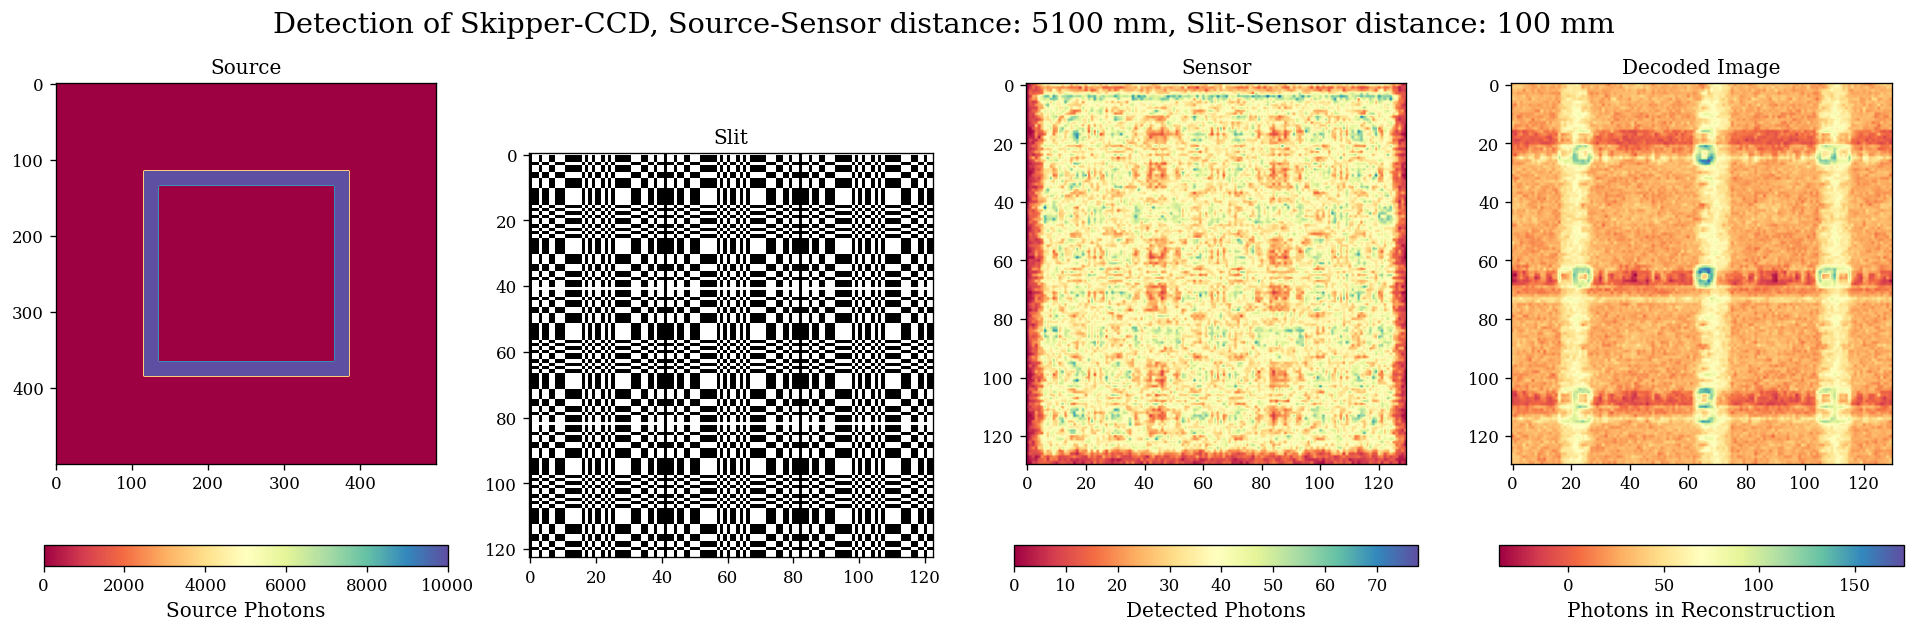

Modified Uniformly Redundant Array
----------------------------------
rank:   5
L:      41
tile:   (3, 3)
width:  123
height: 123
The chosen directory is not empty:
results\mura_exp1\testing_mura1


Process 14364:   0%|          | 10/10000 [00:00<01:43, 96.52it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 14364: 100%|██████████| 10000/10000 [01:20<00:00, 124.99it/s]


Adding noise to the image...
Decoding Image
Done!
Saving results...


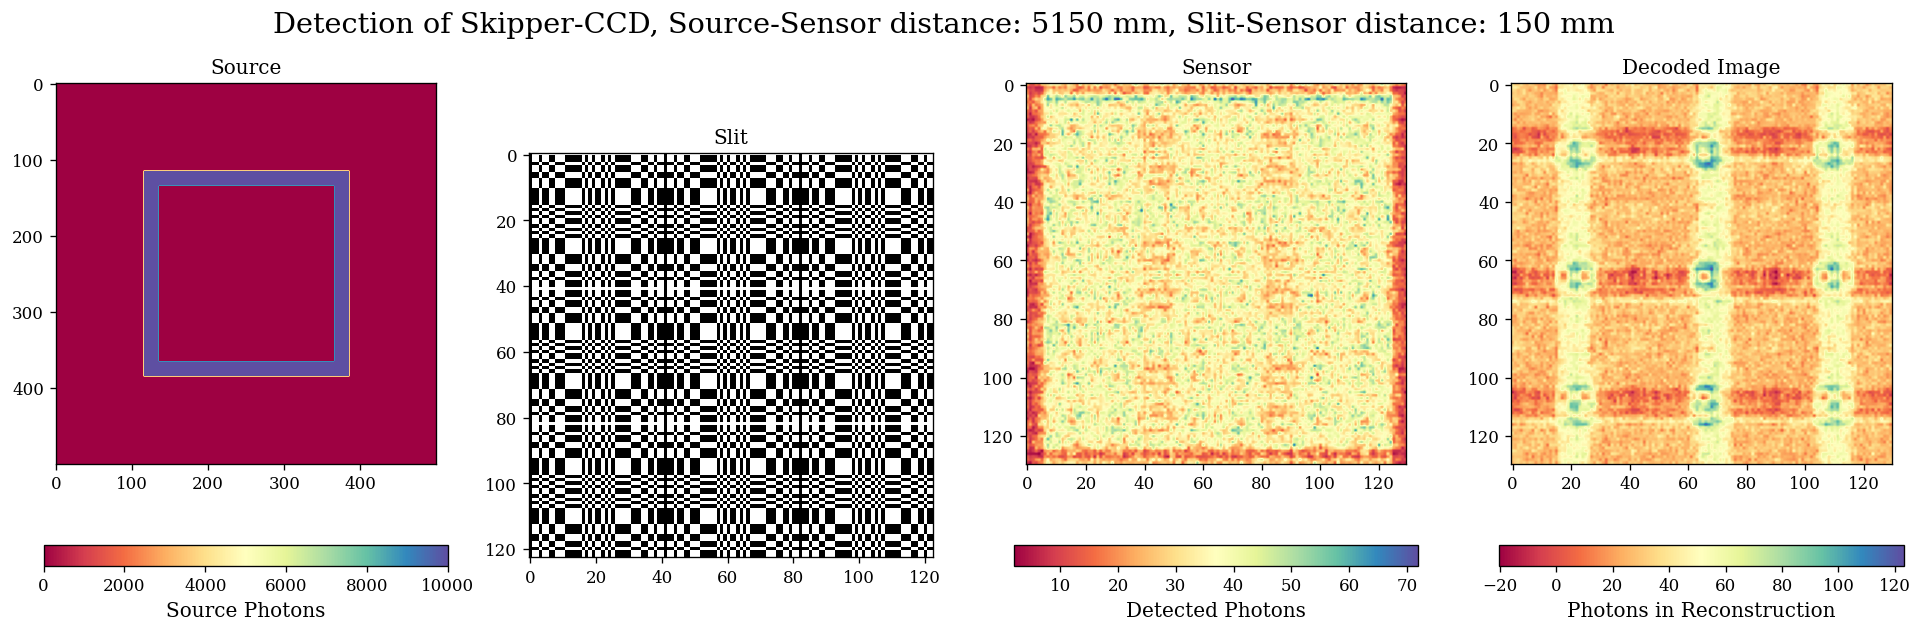

Modified Uniformly Redundant Array
----------------------------------
rank:   5
L:      41
tile:   (3, 3)
width:  123
height: 123
The chosen directory is not empty:
results\mura_exp2\testing_mura2


Process 14364:   0%|          | 9/10000 [00:00<01:54, 87.00it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 14364: 100%|██████████| 10000/10000 [01:23<00:00, 119.10it/s]


Adding noise to the image...
Decoding Image
Done!
Saving results...


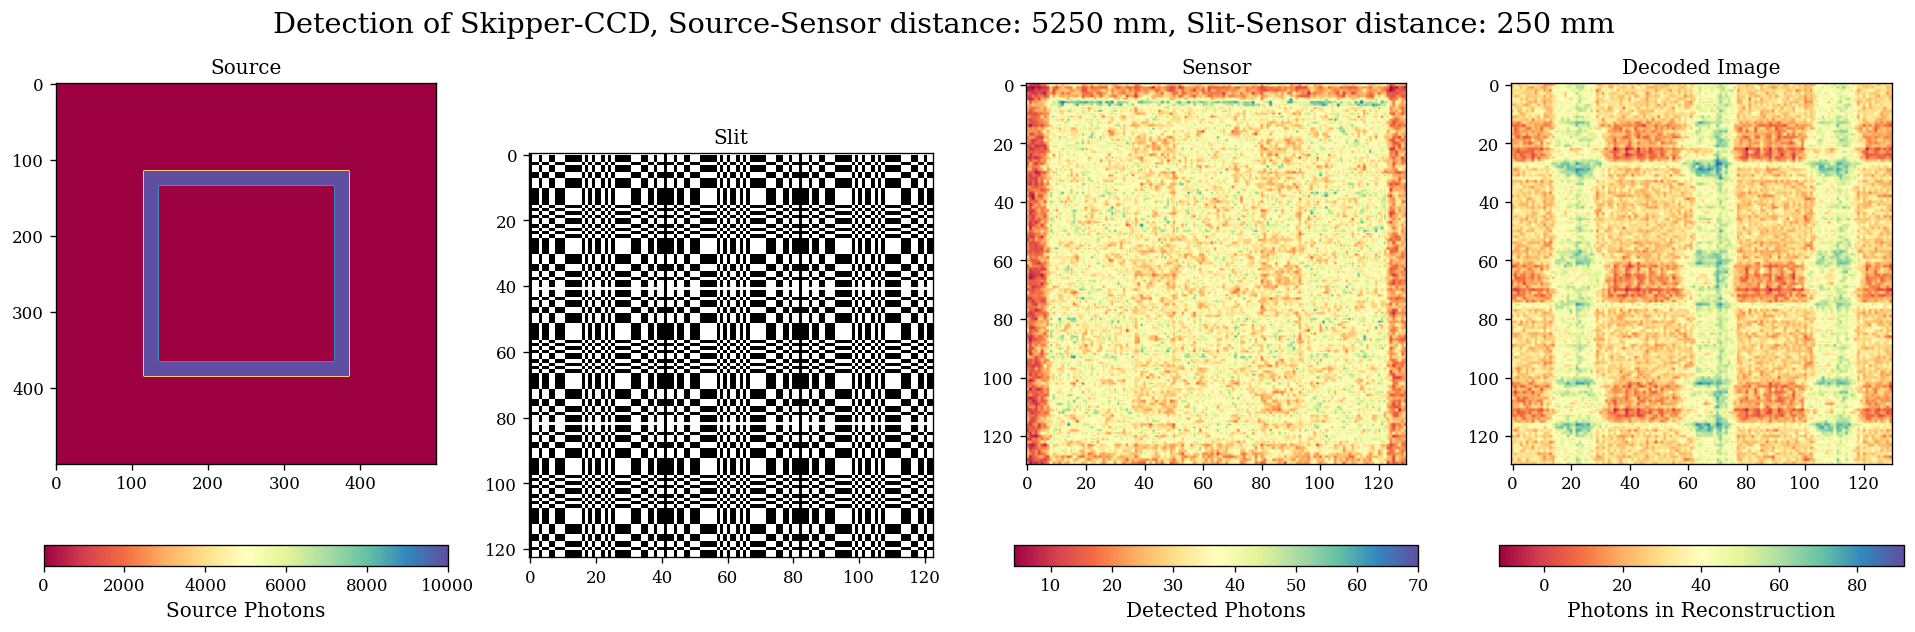

Modified Uniformly Redundant Array
----------------------------------
rank:   5
L:      41
tile:   (3, 3)
width:  123
height: 123
The chosen directory is not empty:
results\mura_exp3\testing_mura3


Process 14364:   0%|          | 10/10000 [00:00<01:44, 95.36it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 14364: 100%|██████████| 10000/10000 [01:31<00:00, 109.19it/s]


Adding noise to the image...
Decoding Image
Done!
Saving results...


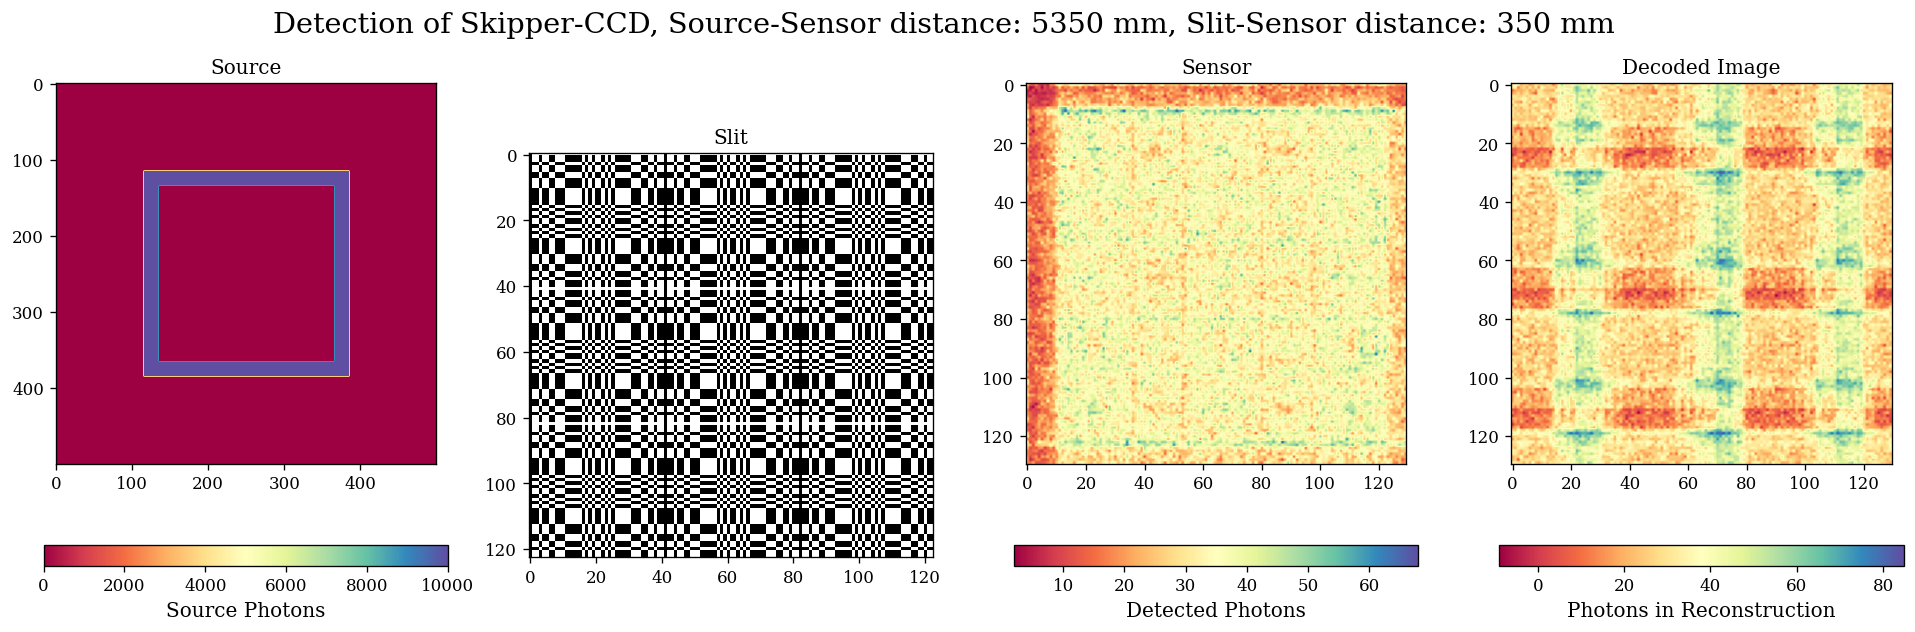

Process 14364:   0%|          | 20/10000 [00:00<01:47, 93.08it/s]

Modified Uniformly Redundant Array
----------------------------------
rank:   5
L:      41
tile:   (3, 3)
width:  123
height: 123
Simulating the propagation of photons through the slit...


Process 14364: 100%|██████████| 10000/10000 [01:27<00:00, 114.74it/s]


Adding noise to the image...
Decoding Image
Done!
Saving results...


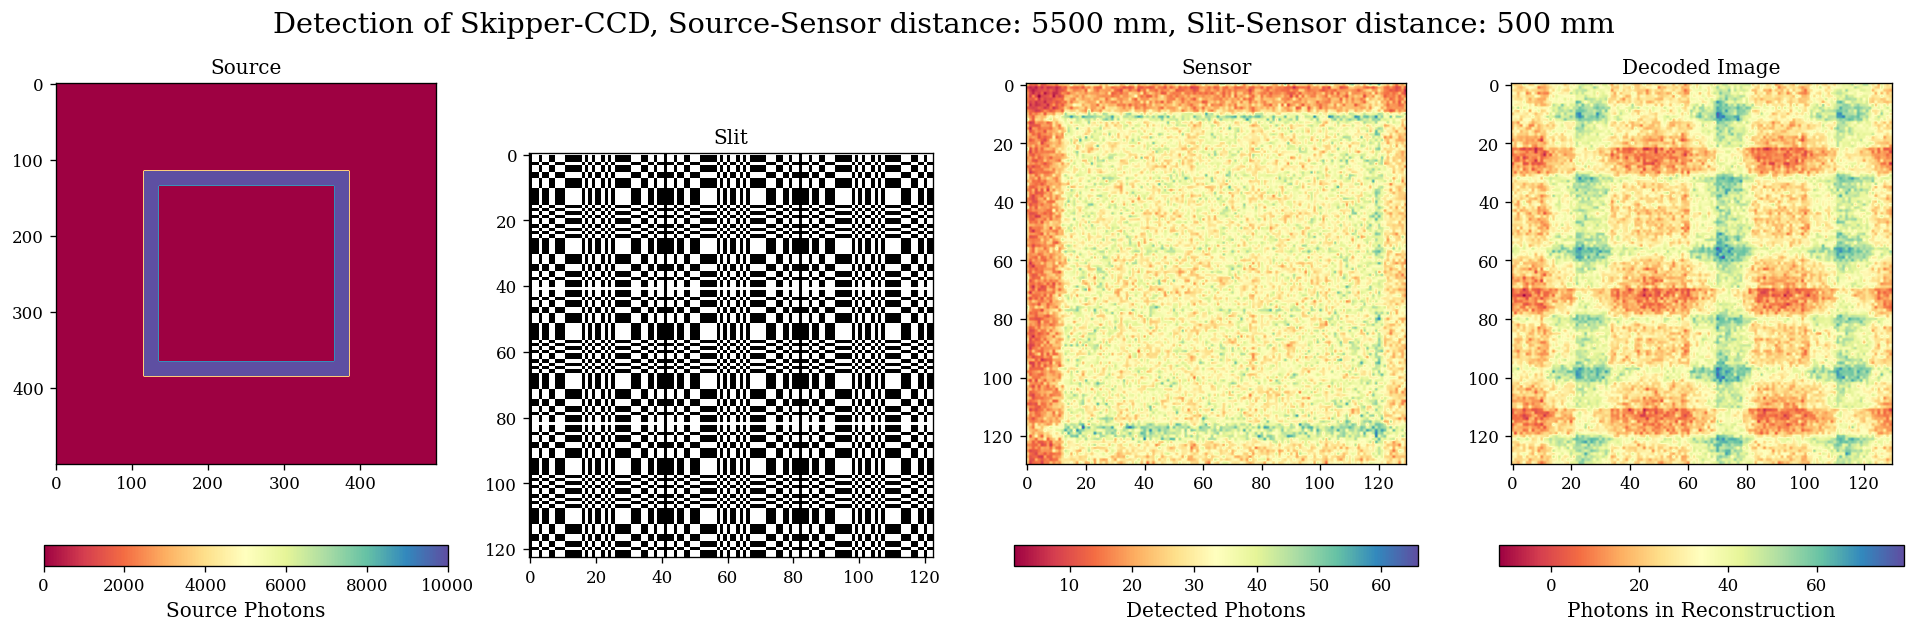

In [4]:
for config in configs:
    source, slit, sensor, decoder, options = get_objects_from_config(config)
    simulator = CodApSimulator(options=options, source=source, slit=slit, sensor=sensor, decoder=decoder)
    play_simulation(simulator=simulator, config_path=config)
    simulators.append(simulator)
    graph_ca(simulator=simulator)

In [5]:
configs = ['mura_exps_trin/mura_exp0.json', 'mura_exps_trin/mura_exp1.json', 'mura_exps_trin/mura_exp2.json', 'mura_exps_trin/mura_exp3.json', 'mura_exps_trin/mura_exp4.json']
simulators1 = []

Modified Uniformly Redundant Array
----------------------------------
rank:   7
L:      61
tile:   (1, 1)
width:  61
height: 61
The chosen directory is not empty:
results\mura_exp0\testing2_mura0


Process 19616:   0%|          | 5/5000 [00:00<01:53, 44.12it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 19616: 100%|██████████| 5000/5000 [01:21<00:00, 61.36it/s]


Adding noise to the image...
Decoding Image
Done!
Saving results...


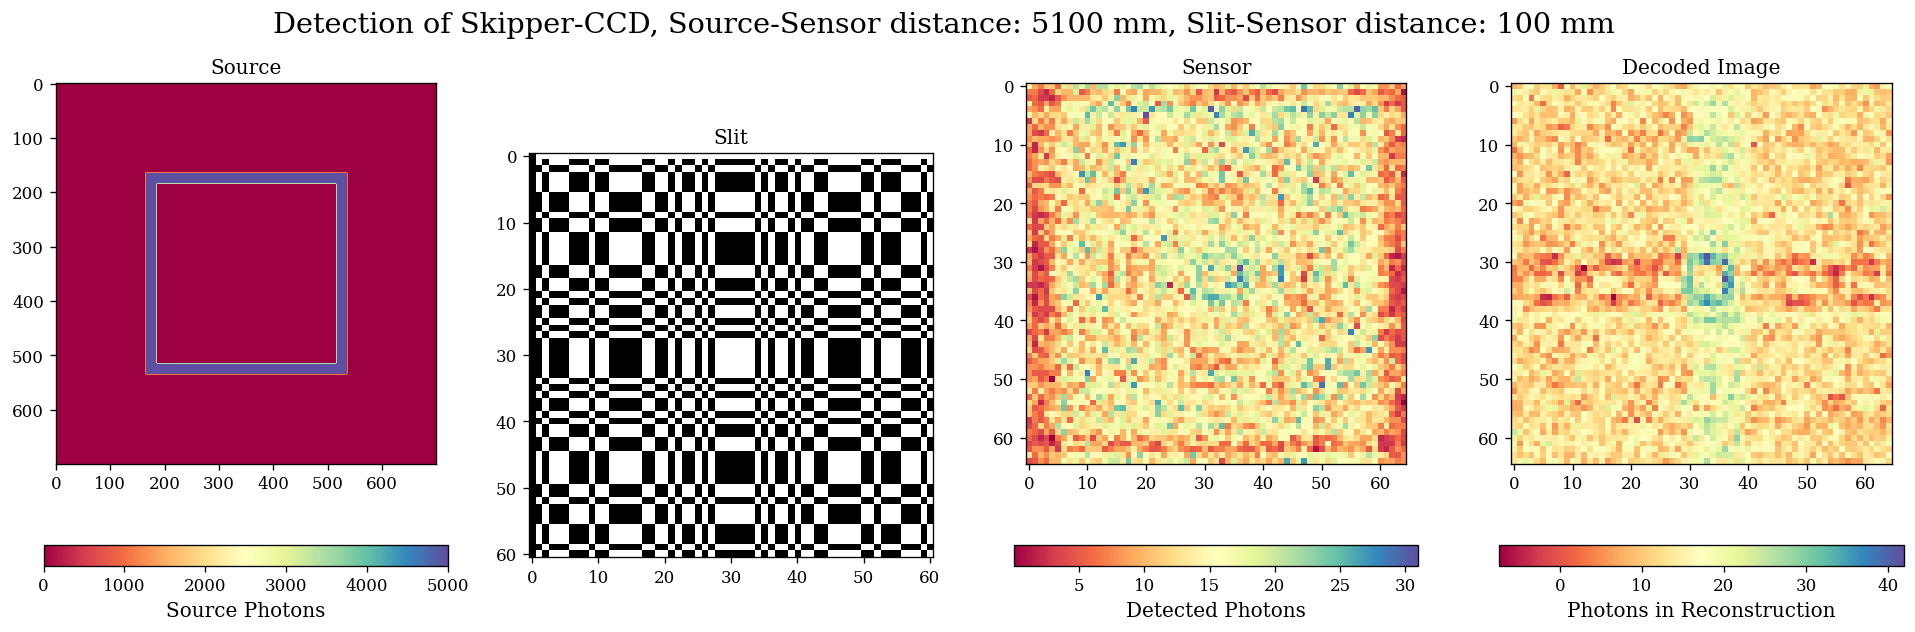

Process 19616:   0%|          | 5/5000 [00:00<01:41, 49.19it/s]

Modified Uniformly Redundant Array
----------------------------------
rank:   7
L:      61
tile:   (1, 1)
width:  61
height: 61
Simulating the propagation of photons through the slit...


Process 19616: 100%|██████████| 5000/5000 [01:21<00:00, 61.43it/s]


Adding noise to the image...
Decoding Image
Done!
Saving results...


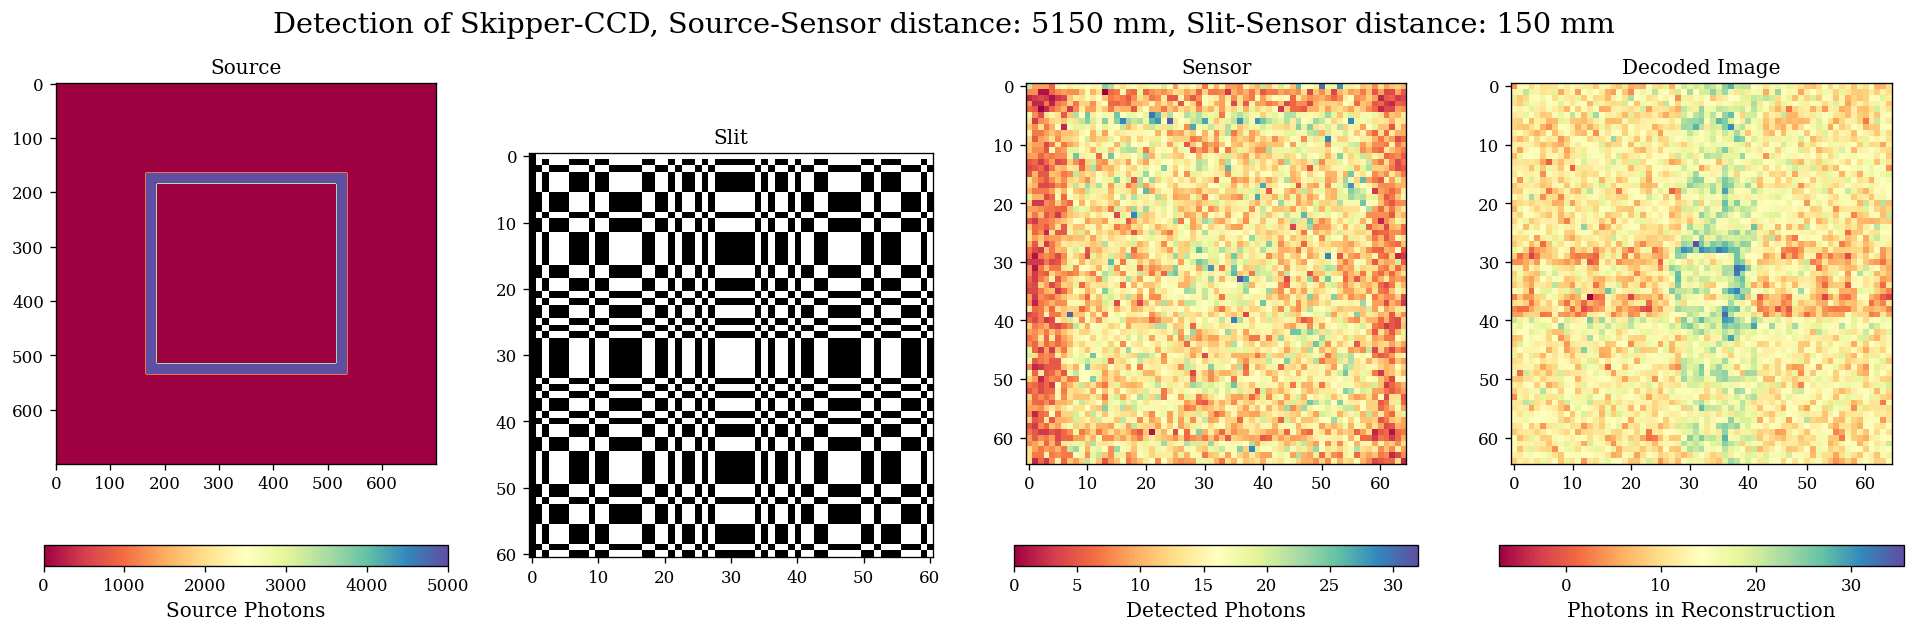

Process 19616:   0%|          | 7/5000 [00:00<01:18, 63.76it/s]

Modified Uniformly Redundant Array
----------------------------------
rank:   7
L:      61
tile:   (1, 1)
width:  61
height: 61
Simulating the propagation of photons through the slit...


Process 19616: 100%|██████████| 5000/5000 [01:20<00:00, 62.07it/s]


Adding noise to the image...
Decoding Image
Done!
Saving results...


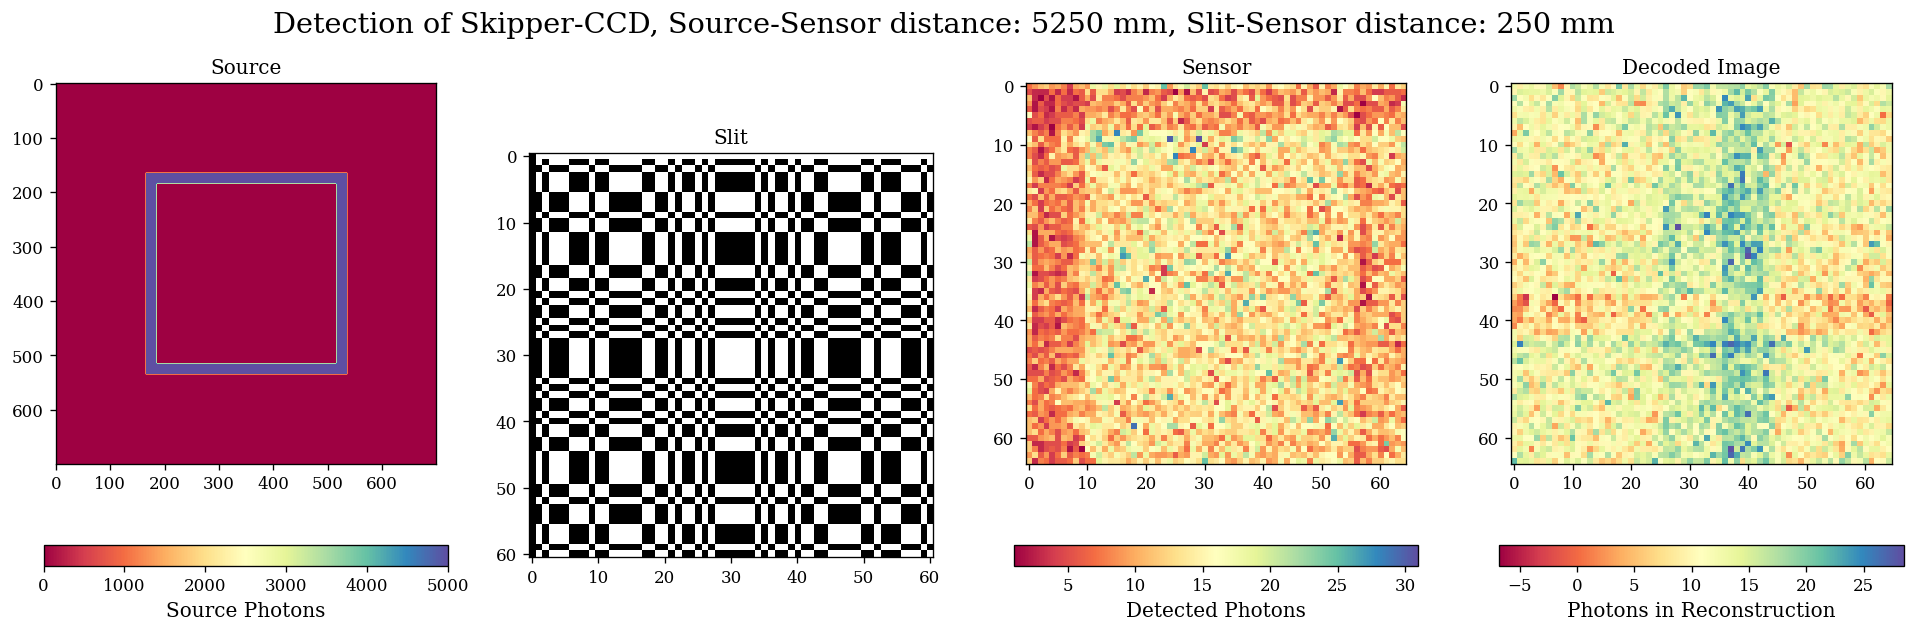

Process 19616:   0%|          | 6/5000 [00:00<01:42, 48.53it/s]

Modified Uniformly Redundant Array
----------------------------------
rank:   7
L:      61
tile:   (1, 1)
width:  61
height: 61
Simulating the propagation of photons through the slit...


Process 19616: 100%|██████████| 5000/5000 [01:23<00:00, 60.09it/s]


Adding noise to the image...
Decoding Image
Done!
Saving results...


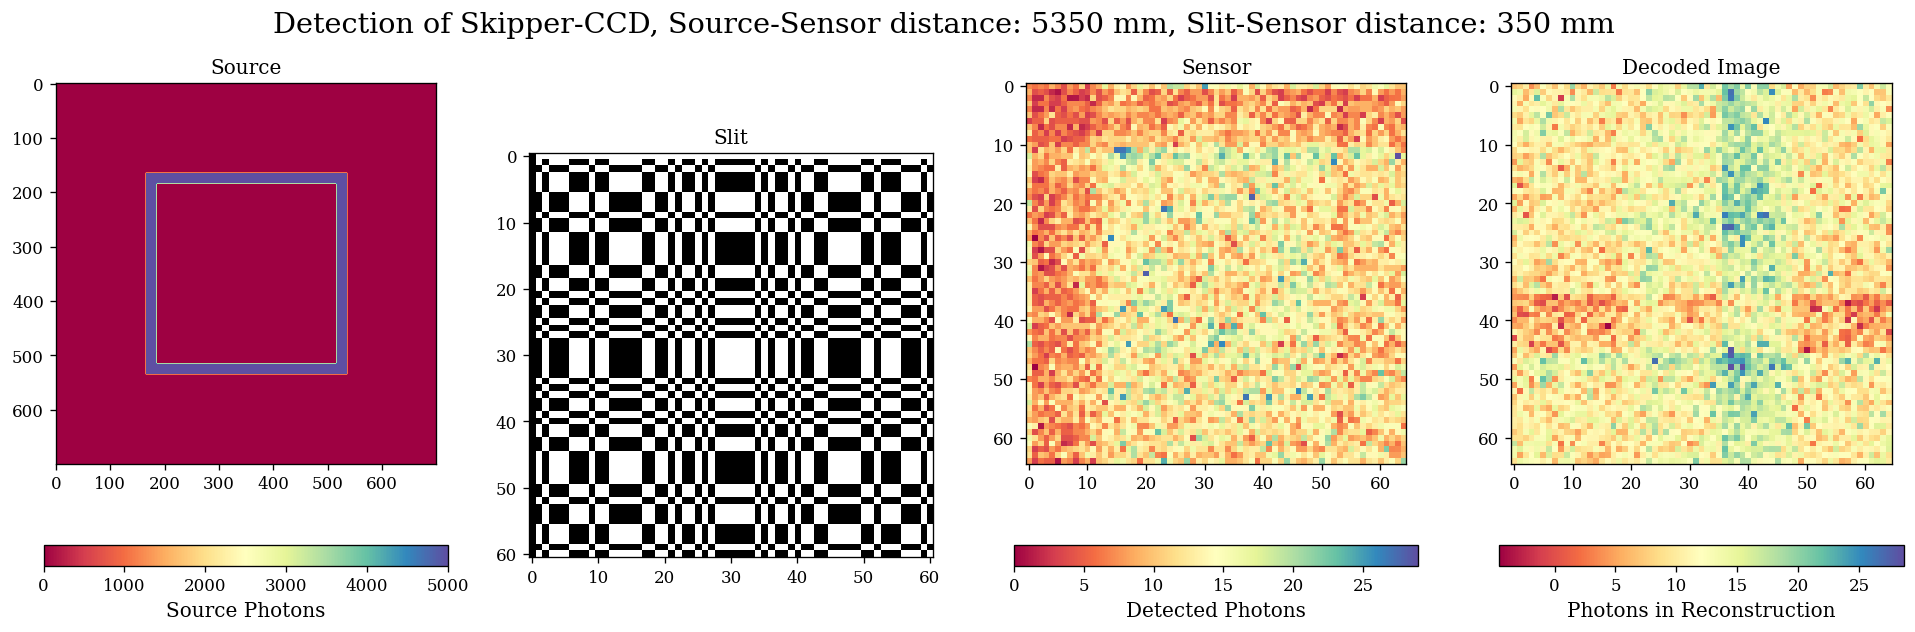

Modified Uniformly Redundant Array
----------------------------------
rank:   7
L:      61
tile:   (1, 1)
width:  61
height: 61
The chosen directory is not empty:
results\mura_exp4\testing1_mura4


Process 19616:   0%|          | 5/5000 [00:00<01:55, 43.23it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 19616: 100%|██████████| 5000/5000 [01:24<00:00, 58.90it/s]


Adding noise to the image...
Decoding Image
Done!
Saving results...


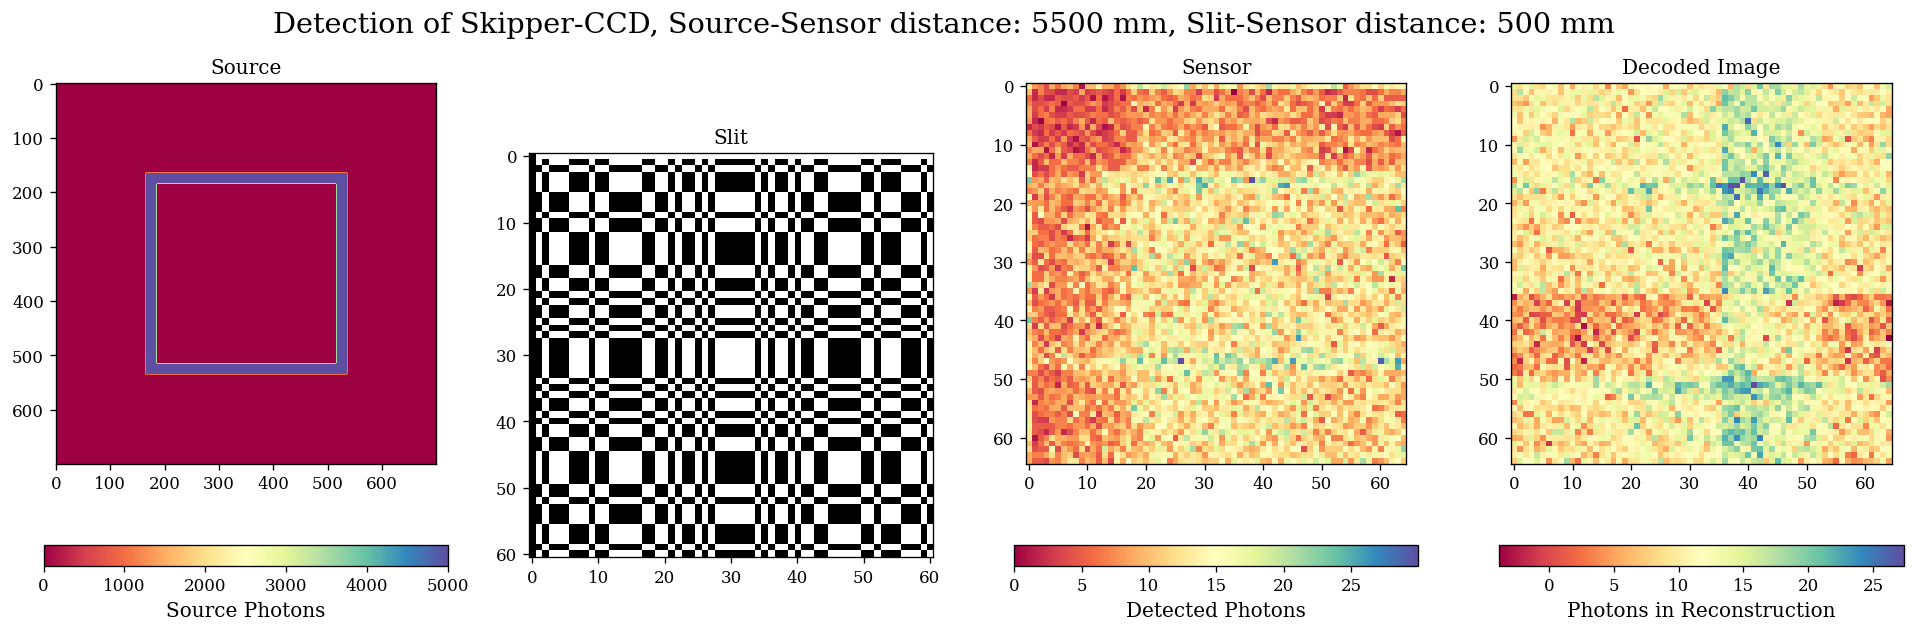

In [6]:
for config in configs:
    source, slit, sensor, decoder, options = get_objects_from_config(config)
    simulator = CodApSimulator(options=options, source=source, slit=slit, sensor=sensor, decoder=decoder)
    play_simulation(simulator=simulator, config_path=config)
    simulators1.append(simulator)
    graph_ca(simulator=simulator)

### **3.2) G-Matrix**

In [2]:
config = 'g_exp.json'

In [4]:
source, slit, sensor, decoder, options = get_objects_from_config(config)
simulator = CodApSimulator(options=options, source=source, slit=slit, sensor=sensor, decoder=decoder)
play_simulation(simulator=simulator, config_path=config)

Process 11592:   0%|          | 0/10000 [00:00<?, ?it/s]

Process 11592:   0%|          | 39/10000 [00:00<00:27, 357.90it/s]

Simulating the propagation of photons through the slit...


Process 11592: 100%|██████████| 10000/10000 [00:28<00:00, 352.91it/s]


Adding noise to the image...
Decoding Image
Done!
Saving results...


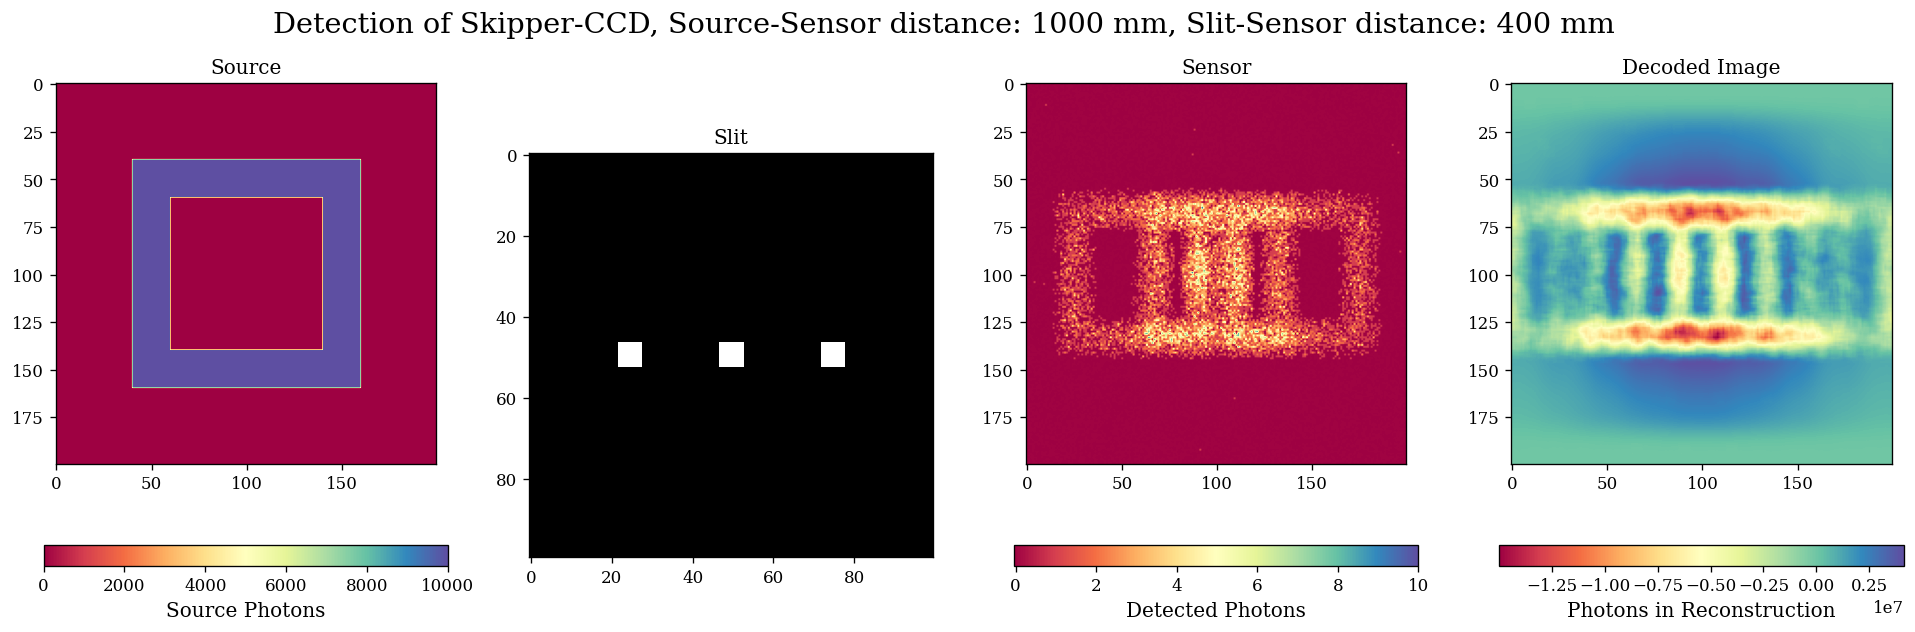

In [5]:
graph_ca(simulator=simulator)